In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import StackingClassifier

In [ ]:
os.chdir('/content/drive/MyDrive/Brain Dead IPL Dataset')

In [ ]:
df = pd.read_csv('matches.csv')

In [ ]:
# Drop irrelevant columns
df = df.drop(columns=['city', 'date'], errors='ignore')
df = df[df['result'] != 'tie']
df = df[df['method'] != 'D/L']

In [ ]:
# Replace inconsistent team names in matches
df['team1'] = df['team1'].replace('Delhi Daredevils', 'Delhi Capitals')
df['team2'] = df['team2'].replace('Delhi Daredevils', 'Delhi Capitals')
df['toss_winner'] = df['toss_winner'].replace('Delhi Daredevils', 'Delhi Capitals')
df['winner'] = df['winner'].replace('Delhi Daredevils', 'Delhi Capitals')
df['team1'] = df['team1'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
df['team2'] = df['team2'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
df['toss_winner'] = df['toss_winner'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
df['winner'] = df['winner'].replace('Deccan Chargers', 'Sunrisers Hyderabad')
df['team1'] = df['team1'].replace('Kings XI Punjab', 'Punjab Kings')
df['team2'] = df['team2'].replace('Kings XI Punjab', 'Punjab Kings')
df['toss_winner'] = df['toss_winner'].replace('Kings XI Punjab', 'Punjab Kings')
df['winner'] = df['winner'].replace('Kings XI Punjab', 'Punjab Kings')
df['team1'] = df['team1'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
df['team2'] = df['team2'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
df['toss_winner'] = df['toss_winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
df['winner'] = df['winner'].replace('Rising Pune Supergiants', 'Rising Pune Supergiant')
df['team1'] = df['team1'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
df['team2'] = df['team2'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
df['toss_winner'] = df['toss_winner'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')
df['winner'] = df['winner'].replace('Royal Challengers Bangalore', 'Royal Challengers Bengaluru')


In [ ]:
df['season_no'] = df['id'].astype(str).str[:3].astype(int)

In [ ]:
replacements = {
    335: 1,
    336: 1,
    392: 2,
    419: 3,
    501: 4,
    548: 5,
    597: 6,
    598: 6,
    729: 7,
    733: 7,
    734: 7,
    829: 8,
    980: 9,
    981: 9,
    108: 10,
    113: 11,
    117: 12,
    118: 12,
    121: 13,
    123: 13,
    125: 14,
    130: 15,
    131: 15,
    135: 16,
    137: 16,
    142: 17
}

df['season_no'] = df['season_no'].replace(replacements)

In [ ]:
df.columns

Index(['id', 'season', 'match_type', 'player_of_match', 'venue', 'team1',
       'team2', 'toss_winner', 'toss_decision', 'winner', 'result',
       'result_margin', 'target_runs', 'target_overs', 'super_over', 'method',
       'umpire1', 'umpire2', 'season_no'],
      dtype='object')

In [ ]:
df = df.drop(columns=['super_over'], errors='ignore')

In [ ]:
df = df.rename(columns={'toss_winner': 'toss_win'})

In [ ]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))
    label_encoders[col] = le

In [ ]:
imputer = SimpleImputer(strategy='most_frequent')
df = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

In [ ]:
# Separate features and target
X = df.drop(columns='winner')
y = df['winner']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
!pip install --upgrade scikit-learn xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 4.4 MB/s eta 0:00:00
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.1.4
    Uninstalling xgboost-2.1.4:
      Successfully uninstalled xgboost-2.1.4


In [ ]:
base_models = [
    ('random_forest', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgboost', XGBClassifier(eval_metric='logloss', random_state=42))
]

In [ ]:
from sklearn.svm import SVC

stacked_model = StackingClassifier(estimators=base_models, final_estimator=SVC(kernel='rbf', probability=True, random_state=42))

In [ ]:
stacked_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:57:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:57:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [09:58:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(s

StackingClassifier(estimators=[('random_forest',
                                RandomForestClassifier(random_state=42)),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_types=None, gamma=None,
                                              grow_poli...
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=None, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=SVC(probability=True, random_state=42))

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

y_pred = stacked_model.predict(X_test)
y_prob = stacked_model.predict_proba(X_test)[:, 1] if len(set(y)) == 2 else None

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

if y_prob is not None:
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC curve not generated for multi-class classification.")

print("Model training and evaluation complete.")

Accuracy: 0.7594339622641509
Confusion Matrix:
 [[26  0  0  0  0  1  0  0  0  0  0  0  0  0  0]
 [ 0 15  0  2  0  0  0  0  0  1  1  0  1  2  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  3  0  0  0 21  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  1  0  1  0  3  0 23  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  1  1  0  0  1  0  2  0 15  0  0  1  0  0]
 [ 1  2  0  0  0  0  0  1  0  2 14  0  1  1  0]
 [ 0  1  0  0  0  0  0  0  0  1  0  0  0  1  0]
 [ 1  1  0  0  0  0  0  0  0  1  1  0 19  0  0]
 [ 0  0  0  0  0  0  0  3  0  2  1  0  2 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.96      0.95        27
         1.0       0.62      0.68      0.65        22
         2.0       0.67      0.67      0.67 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


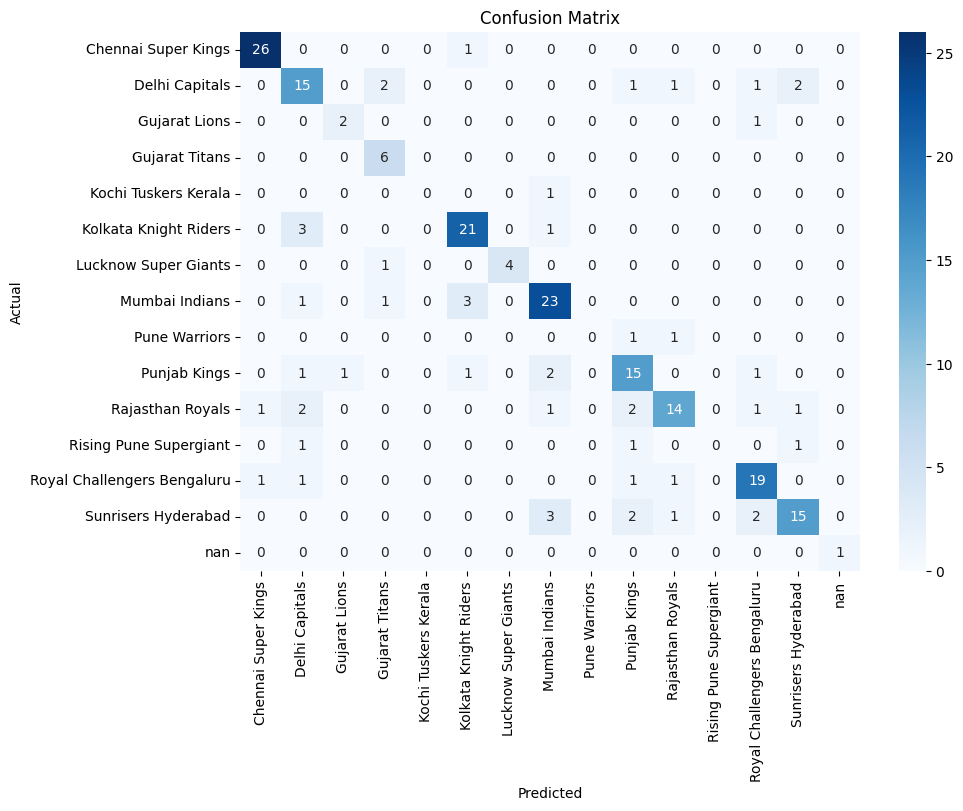

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = label_encoders['winner'].classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
!pip install hyperopt
!pip install imbalanced-learn

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42,  k_neighbors=2)
X_train, y_train = smote.fit_resample(X_train, y_train)

In [ ]:
from sklearn.model_selection import StratifiedKFold

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

def objective(params):
    rf_params = {
        'n_estimators': int(params['rf_n_estimators']),
        'max_depth': int(params['rf_max_depth']),
        'min_samples_split': int(params['rf_min_samples_split']),
    }

    xgb_params = {
        'n_estimators': int(params['xgb_n_estimators']),
        'max_depth': int(params['xgb_max_depth']),
        'learning_rate': params['xgb_learning_rate'],
    }

    base_models = [
        ('random_forest', RandomForestClassifier(**rf_params, random_state=42)),
        ('xgb_classifier', XGBClassifier(eval_metric='logloss', random_state=42))
    ]

    stacked_model = StackingClassifier(estimators=base_models, final_estimator=SVC(kernel='rbf', probability=True, random_state=42))

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Use shuffle=True
    cv_scores = cross_val_score(stacked_model, X_train, y_train, cv=skf, scoring='accuracy')

    return {'loss': -np.mean(cv_scores), 'status': STATUS_OK}


space = {
    'rf_n_estimators': hp.quniform('rf_n_estimators', 50, 200, 10),
    'rf_max_depth': hp.quniform('rf_max_depth', 5, 20, 1),
    'rf_min_samples_split': hp.quniform('rf_min_samples_split', 2, 10, 1),
    'xgb_n_estimators': hp.quniform('xgb_n_estimators', 50, 200, 10),
    'xgb_max_depth': hp.quniform('xgb_max_depth', 3, 10, 1),
    'xgb_learning_rate': hp.uniform('xgb_learning_rate', 0.01, 0.3),
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,  # You can increase this for better results
            trials=trials)

print("Best hyperparameters found:", best)

# Now, train the final model with the best hyperparameters
best_rf_params = {
    'n_estimators': int(best['rf_n_estimators']),
    'max_depth': int(best['rf_max_depth']),
    'min_samples_split': int(best['rf_min_samples_split']),
}

best_xgb_params = {
    'n_estimators': int(best['xgb_n_estimators']),
    'max_depth': int(best['xgb_max_depth']),
    'learning_rate': best['xgb_learning_rate'],
}


best_base_models = [
    ('random_forest', RandomForestClassifier(**best_rf_params, random_state=42)),
    ('xgboost', XGBClassifier(eval_metric='logloss', **best_xgb_params, random_state=42))
]

best_stacked_model = StackingClassifier(estimators=best_base_models, final_estimator=SVC(kernel='rbf', probability=True, random_state=42))
best_stacked_model.fit(X_train, y_train)

y_pred = best_stacked_model.predict(X_test)

print("Accuracy with best hyperparameters:", accuracy_score(y_test, y_pred))


100%|██████████| 50/50 [24:58<00:00, 29.98s/trial, best loss: -0.8584795321637427]
Best hyperparameters found: {'rf_max_depth': np.float64(17.0), 'rf_min_samples_split': np.float64(3.0), 'rf_n_estimators': np.float64(70.0), 'xgb_learning_rate': np.float64(0.24149647891967466), 'xgb_max_depth': np.float64(7.0), 'xgb_n_estimators': np.float64(170.0)}
Accuracy with best hyperparameters: 0.7877358490566038


In [ ]:
import pickle

# Save the model
with open('best_stacked_model.pkl', 'wb') as f:
    pickle.dump(best_stacked_model, f)


In [ ]:
# Load the model
with open('best_stacked_model.pkl', 'rb') as f:
    loaded_model = pickle.load(f)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

if y_prob is not None:
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()
else:
    print("ROC curve not generated for multi-class classification.")

Accuracy: 0.7877358490566038
Confusion Matrix:
 [[25  0  0  1  0  0  0  0  1  0  0  0  0  0  0]
 [ 0 15  0  2  0  1  0  0  0  1  1  0  0  2  0]
 [ 0  0  2  0  0  0  0  0  0  0  0  0  1  0  0]
 [ 0  0  0  6  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  3  0  0  0 21  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  1  0  0  4  0  0  0  0  0  0  0  0]
 [ 0  1  0  0  0  3  0 23  0  0  1  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  1  0  0  0  0]
 [ 0  1  0  0  0  1  0  1  0 18  0  0  0  0  0]
 [ 0  2  0  0  0  0  0  0  0  2 18  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  1  0  0  1  1  0]
 [ 1  1  0  0  0  0  0  0  0  1  1  0 19  0  0]
 [ 0  0  0  0  0  0  0  3  0  2  1  0  2 15  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]]
Classification Report:
               precision    recall  f1-score   support

         0.0       0.96      0.93      0.94        27
         1.0       0.65      0.68      0.67        22
         2.0       1.00      0.67      0.80 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


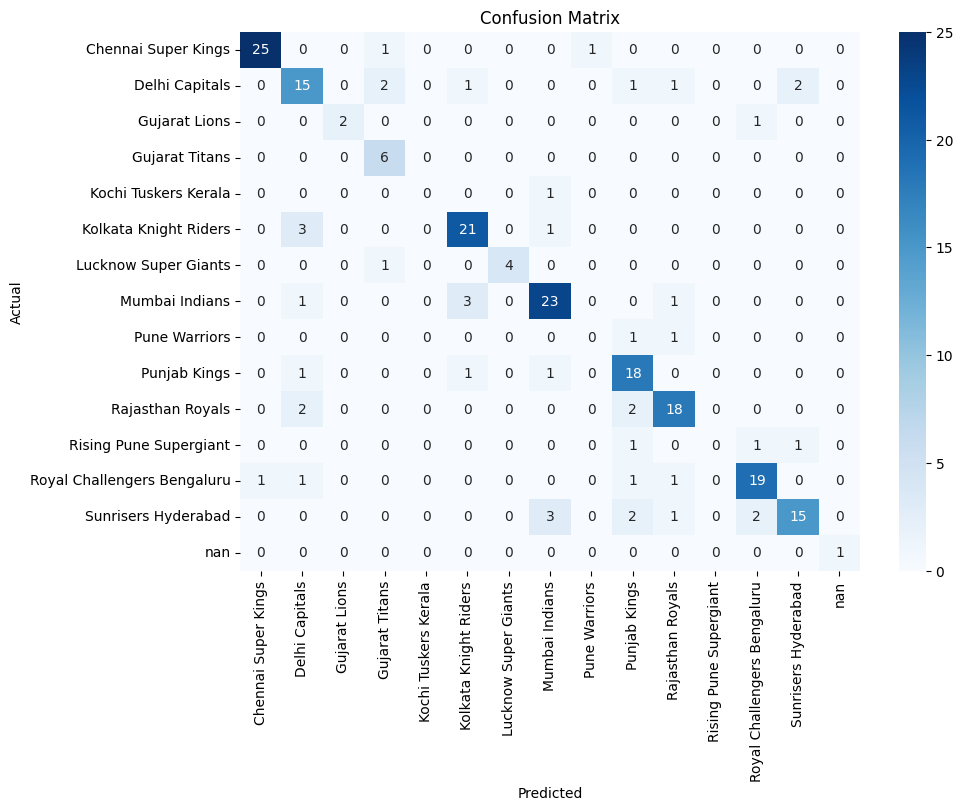

In [ ]:
cm = confusion_matrix(y_test, y_pred)

# Get class labels
class_labels = label_encoders['winner'].classes_

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


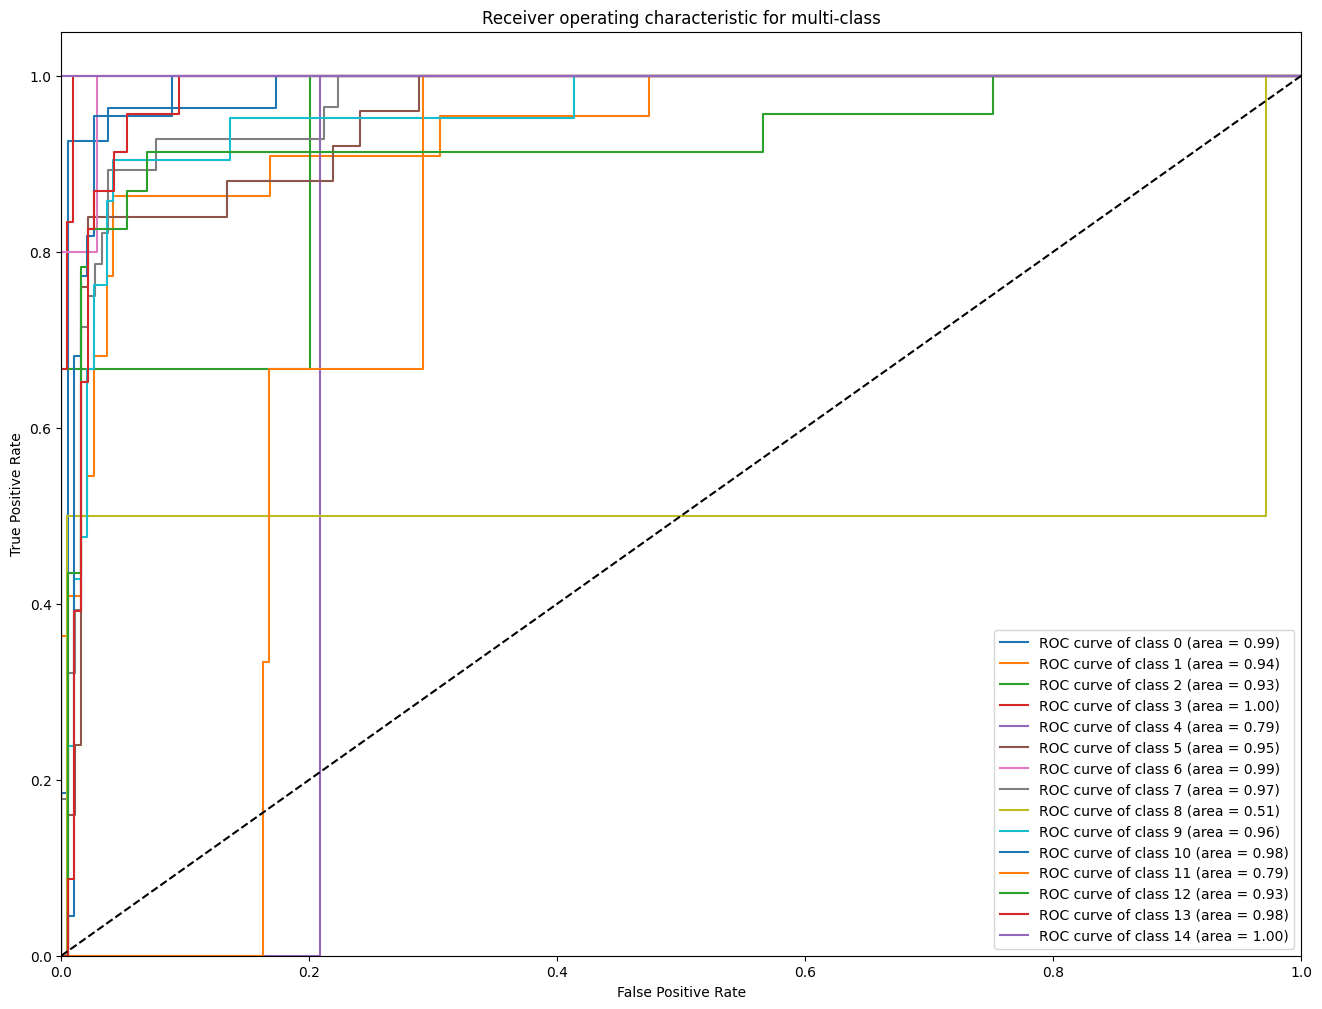

In [ ]:
# Calculate and plot ROC curve for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(16, 12))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import StratifiedKFold

from hyperopt import hp, fmin, tpe, Trials, STATUS_OK
from sklearn.model_selection import cross_val_score

def objective(params):
    rf_params = {
        'n_estimators': int(params['rf_n_estimators']),
        'max_depth': int(params['rf_max_depth']),
        'min_samples_split': int(params['rf_min_samples_split']),
    }

    xgb_params = {
        'n_estimators': int(params['xgb_n_estimators']),
        'max_depth': int(params['xgb_max_depth']),
        'learning_rate': params['xgb_learning_rate'],
    }

    best_base_models = [
        ('random_forest', RandomForestClassifier(**rf_params, random_state=42)),
        ('xgboost', XGBClassifier(eval_metric='logloss', **xgb_params, random_state=42))
    ]

    best_stacked_model = StackingClassifier(
        estimators=best_base_models,
        final_estimator=RandomForestClassifier(random_state=42)
    )

    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)  # Use shuffle=True
    cv_scores = cross_val_score(stacked_model, X_train, y_train, cv=skf, scoring='accuracy')

    return {'loss': -np.mean(cv_scores), 'status': STATUS_OK}


space = {
    'rf_n_estimators': hp.quniform('rf_n_estimators', 50, 200, 10),
    'rf_max_depth': hp.quniform('rf_max_depth', 5, 20, 1),
    'rf_min_samples_split': hp.quniform('rf_min_samples_split', 2, 10, 1),
    'xgb_n_estimators': hp.quniform('xgb_n_estimators', 50, 200, 10),
    'xgb_max_depth': hp.quniform('xgb_max_depth', 3, 10, 1),
    'xgb_learning_rate': hp.uniform('xgb_learning_rate', 0.01, 0.3),
}

trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=50,
            trials=trials)

print("Best hyperparameters found:", best)

# Now, train the final model with the best hyperparameters
best_rf_params = {
    'n_estimators': int(best['rf_n_estimators']),
    'max_depth': int(best['rf_max_depth']),
    'min_samples_split': int(best['rf_min_samples_split']),
}

best_xgb_params = {
    'n_estimators': int(best['xgb_n_estimators']),
    'max_depth': int(best['xgb_max_depth']),
    'learning_rate': best['xgb_learning_rate'],
}


best_base_models = [
    ('random_forest', RandomForestClassifier(**best_rf_params, random_state=42)),
    ('xgboost', XGBClassifier(eval_metric='logloss', **best_xgb_params, random_state=42))
]

best_stacked_model = StackingClassifier(
    estimators=best_base_models,
    final_estimator=RandomForestClassifier(random_state=42)
)

best_stacked_model.fit(X_train, y_train)

y_pred = best_stacked_model.predict(X_test)

# print("Accuracy with best hyperparameters:", accuracy_score(y_test, y_pred))


100%|██████████| 50/50 [25:24<00:00, 30.48s/trial, best loss: -0.8573099415204679]
Best hyperparameters found: {'rf_max_depth': np.float64(11.0), 'rf_min_samples_split': np.float64(2.0), 'rf_n_estimators': np.float64(140.0), 'xgb_learning_rate': np.float64(0.2180228487128317), 'xgb_max_depth': np.float64(4.0), 'xgb_n_estimators': np.float64(120.0)}


NameError: name 'accuracy_score' is not defined

In [ ]:
import pickle

# Save the model
with open('best_stacked_model_rf.pkl', 'wb') as f:
    pickle.dump(best_stacked_model, f)


In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve

print("Accuracy with best hyperparameters:", accuracy_score(y_test, y_pred))

Accuracy with best hyperparameters: 0.7971698113207547


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                              precision    recall  f1-score   support

        Chennai Super Kings       0.92      0.89      0.91        27
             Delhi Capitals       0.71      0.77      0.74        22
              Gujarat Lions       1.00      0.67      0.80         3
             Gujarat Titans       0.67      1.00      0.80         6
       Kochi Tuskers Kerala       0.00      0.00      0.00         1
      Kolkata Knight Riders       0.81      0.84      0.82        25
       Lucknow Super Giants       1.00      0.80      0.89         5
             Mumbai Indians       0.83      0.86      0.84        28
              Pune Warriors       0.00      0.00      0.00         2
               Punjab Kings       0.65      0.71      0.68        21
           Rajasthan Royals       0.85      0.77      0.81        22
     Rising Pune Supergiant       0.00      0.00      0.00         3
Royal Challengers Bengaluru       0.76      0.83      0.79        23
        S

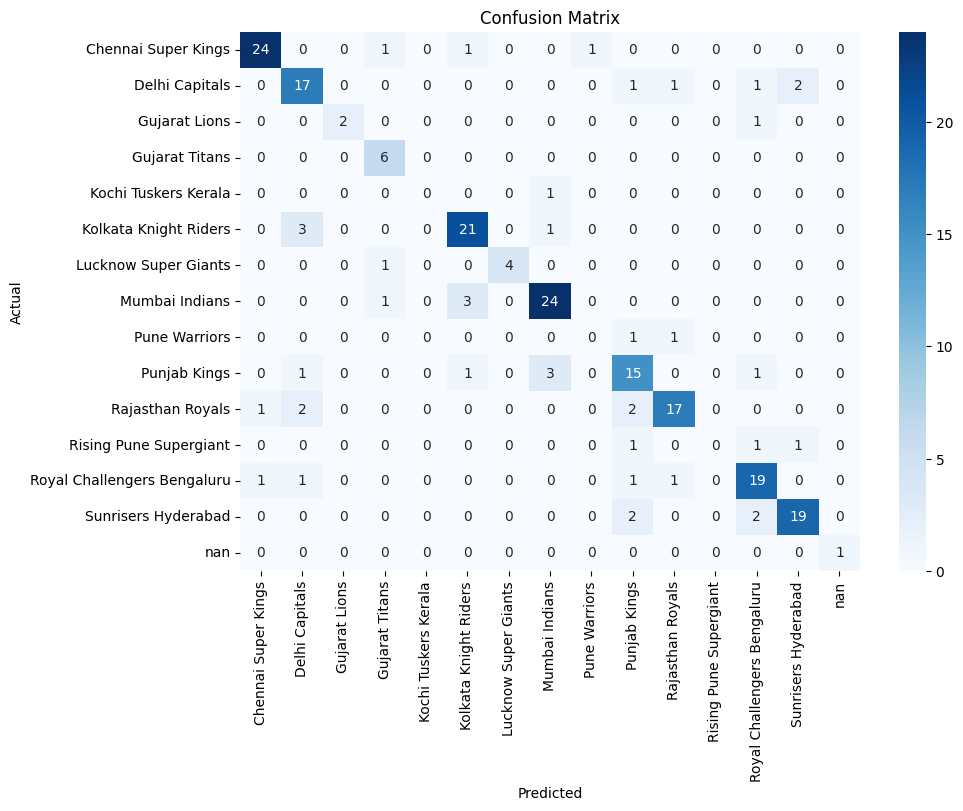

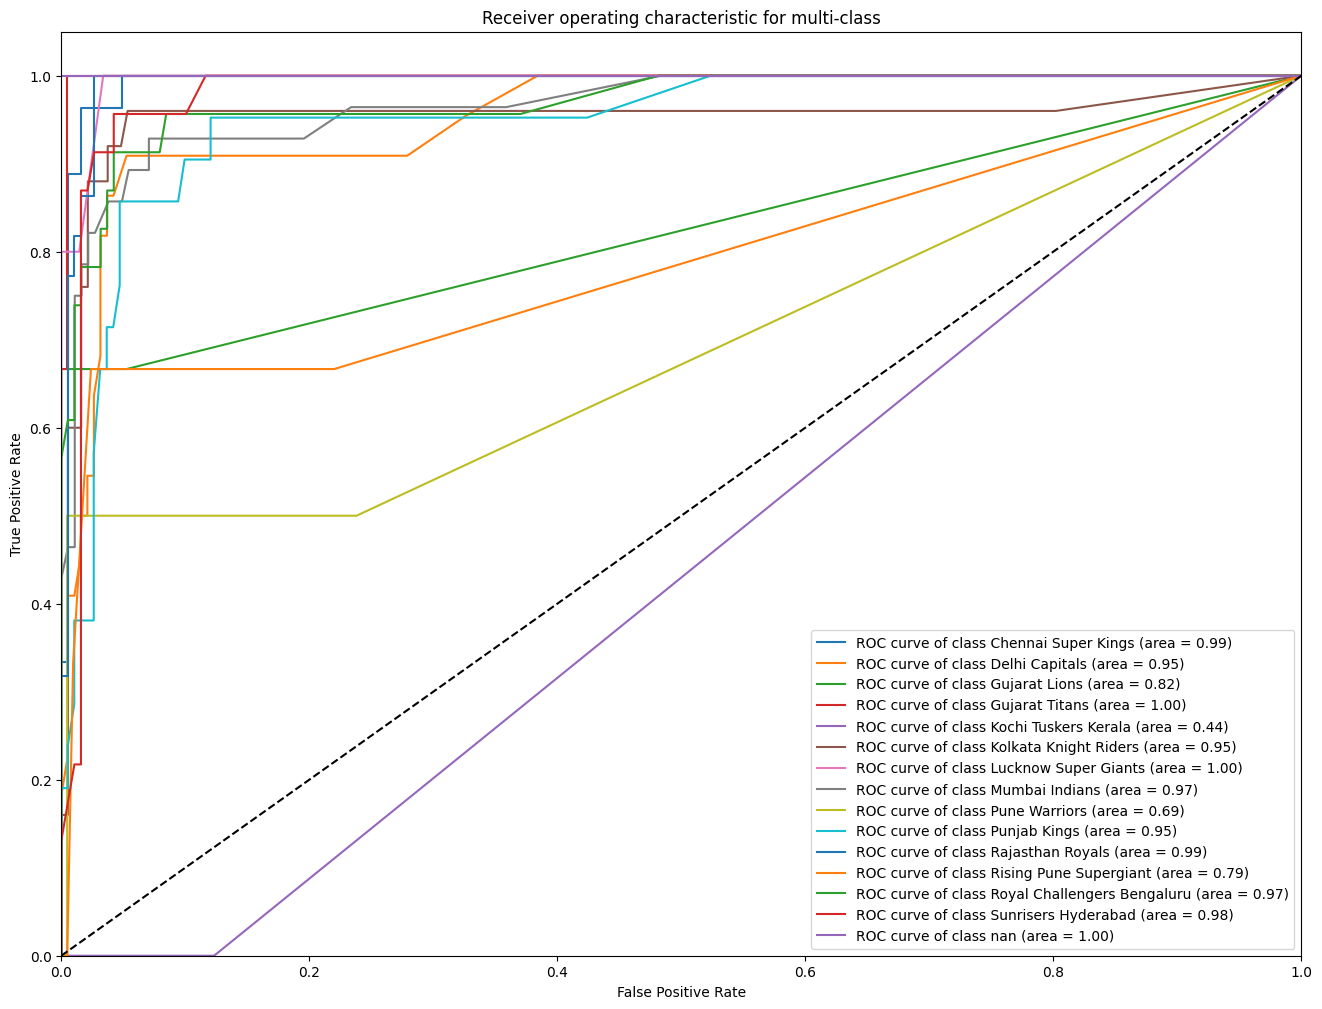

In [ ]:
# Get class labels
class_labels = label_encoders['winner'].classes_

cr = classification_report(y_test, y_pred, target_names=class_labels)

print("Classification Report:\n", cr)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate and plot ROC curve for each class
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Binarize the output
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_bin.shape[1]

# Get predicted probabilities instead of predicted labels
y_prob = best_stacked_model.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i]) # Use y_prob here
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot all ROC curves
plt.figure(figsize=(16, 12))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(class_labels[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(best_stacked_model)

StackingClassifier(estimators=[('random_forest',
                                RandomForestClassifier(max_depth=11,
                                                       n_estimators=140,
                                                       random_state=42)),
                               ('xgboost',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric='logloss',
                                              feature_t...
            

In [ ]:
!pip install graphviz

In [ ]:
from sklearn.utils import estimator_html_repr
from IPython.core.display import display, HTML

# Display the model structure
display(HTML(estimator_html_repr(best_stacked_model)))